<a href="https://colab.research.google.com/github/ayushpratapsingh1/Skygeni-Project/blob/main/Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📊 Data Analysis Overview

In this analysis, I explored multiple datasets related to subscription details, payment records, financial indicators, and client industries. My objective was to extract valuable insights that could help the organization better understand client behavior, renewal trends, payment patterns, and the influence of economic factors like inflation. I carried out data cleaning, filtering, and performed various calculations to address key business questions and uncover actionable trends.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading all datasets
subscription = pd.read_csv('Datasets/subscription_information.csv', parse_dates=['start_date', 'end_date'])
payment = pd.read_csv('Datasets/payment_information.csv', parse_dates=['payment_date'])
financial = pd.read_csv('Datasets/finanical_information.csv', parse_dates=['start_date', 'end_date'])
industry = pd.read_csv('Datasets/industry_client_details.csv')

print(subscription.head())
print(payment.head())
print(financial.head())
print(industry.head())


    client_id subscription_type start_date   end_date  renewed
0  1131383004            Yearly 2020-11-11 2021-11-11    False
1  4309371709           Monthly 2021-05-24 2021-06-23     True
2  3183675157            Yearly 2021-12-25 2022-12-25     True
3  5371694837           Monthly 2020-03-14 2020-04-13     True
4  5157113076           Monthly 2019-11-07 2019-12-07    False
    client_id payment_date  amount_paid payment_method
0  6292156167   2019-09-16        447.0  Bank Transfer
1  7462725203   2018-05-21        379.7  Bank Transfer
2  4698004907   2021-09-11        435.1          Check
3  3510240337   2020-12-07        413.1          Check
4  7501599785   2019-03-04         61.1  Bank Transfer
   Unnamed: 0 start_date   end_date  inflation_rate  gdp_growth_rate
0           0 2018-01-01 2018-03-31            5.77             3.51
1           1 2018-04-01 2018-06-30            1.17             2.15
2           2 2018-07-01 2018-09-30            1.56             1.82
3           3 20

### Data Cleaning Process

Upon reviewing the dataset, I noticed that the date formats were inconsistent, which could lead to potential errors during analysis. To avoid such issues, I decided to standardize the date formats across the dataset. After conducting the analysis, it became evident that a more thorough data cleaning process is required to ensure the data is accurate and reliable.


In [27]:

# Cleaning subscription_information.csv
subscription['renewed'] = subscription['renewed'].astype(bool)
subscription['start_date'] = pd.to_datetime(subscription['start_date'], errors='coerce')
subscription['end_date'] = pd.to_datetime(subscription['end_date'], errors='coerce')

# Cleaning payment_information.csv
payment['payment_date'] = pd.to_datetime(payment['payment_date'], errors='coerce')
payment['amount_paid'] = pd.to_numeric(payment['amount_paid'], errors='coerce')

# Cleaning financial_information.csv
financial = financial.drop(columns=['Unnamed: 0'], errors='ignore')
financial['start_date'] = pd.to_datetime(financial['start_date'], errors='coerce')
financial['end_date'] = pd.to_datetime(financial['end_date'], errors='coerce')

# Cleaning industrial.csv
industry['client_id'] = pd.to_numeric(industry['client_id'], errors='coerce')

# Cleaning client_id fields across datasets to ensure proper joining
subscription['client_id'] = pd.to_numeric(subscription['client_id'], errors='coerce')
payment['client_id'] = pd.to_numeric(payment['client_id'], errors='coerce')

# Drop null client_ids if any after conversion
subscription.dropna(subset=['client_id'], inplace=True)
payment.dropna(subset=['client_id'], inplace=True)
industry.dropna(subset=['client_id'], inplace=True)
print(subscription.head())
print(payment.head())
print(financial.head())
print(industry.head())

    client_id subscription_type start_date   end_date  renewed
0  1131383004            Yearly 2020-11-11 2021-11-11    False
1  4309371709           Monthly 2021-05-24 2021-06-23     True
2  3183675157            Yearly 2021-12-25 2022-12-25     True
3  5371694837           Monthly 2020-03-14 2020-04-13     True
4  5157113076           Monthly 2019-11-07 2019-12-07    False
    client_id payment_date  amount_paid payment_method
0  6292156167   2019-09-16        447.0  Bank Transfer
1  7462725203   2018-05-21        379.7  Bank Transfer
2  4698004907   2021-09-11        435.1          Check
3  3510240337   2020-12-07        413.1          Check
4  7501599785   2019-03-04         61.1  Bank Transfer
  start_date   end_date  inflation_rate  gdp_growth_rate
0 2018-01-01 2018-03-31            5.77             3.51
1 2018-04-01 2018-06-30            1.17             2.15
2 2018-07-01 2018-09-30            1.56             1.82
3 2018-10-01 2018-12-31            2.78             2.43
4 2019-

### 1. How many Finance Lending and Blockchain clients does the organization have?
I am filtering the dataset to identify how many clients belong to the "Finance Lending" and "Blockchain" industries in order to understand the distribution of clients across these sectors.


In [28]:
finance_blockchain = industry[industry['industry'].isin(['Finance Lending', 'Block Chain'])]
counts = finance_blockchain['industry'].value_counts()
print("Number of clients:\n", counts)

# The organization has more clients in Finance Lending than in Block Chain,
# indicating a stronger presence in traditional financial sectors.


Number of clients:
 industry
Block Chain        25
Finance Lending    22
Name: count, dtype: int64


### 2. Which industry in the organization has the highest renewal rate?
I am grouping the dataset by industry and calculating the renewal rate for each, then identifying the industry with the highest renewal rate to understand where clients are most likely to renew their subscriptions.


In [29]:
# Merging subscription data with industry
sub_industry = subscription.merge(industry, on='client_id', how='left')

# Grouping by industry and calculating renewal rate
renewal_rate = sub_industry.groupby('industry')['renewed'].mean().sort_values(ascending=False)
print("Industry-wise renewal rate:\n", renewal_rate)

# Clients from the Gaming industry are the most loyal, with a 72% renewal rate.

Industry-wise renewal rate:
 industry
Gaming             0.727273
AI                 0.636364
Finance Lending    0.545455
Hyper Local        0.450000
Block Chain        0.440000
Name: renewed, dtype: float64


### 3. What was the average inflation rate when their subscriptions were renewed?
I am matching the subscription renewal dates with the relevant financial quarters, extracting the inflation rate for each renewal period, and calculating the average inflation rate across all renewed subscriptions to understand the economic conditions during these renewals.


In [33]:
renewed_subs = subscription[subscription['renewed'] == True]

inflation_list = []

for date in renewed_subs['end_date']:
    for i, row in financial.iterrows():
        if row['start_date'] <= date <= row['end_date']:
            inflation_list.append(row['inflation_rate'])
            break
    else:
        inflation_list.append(np.nan)

renewed_subs['inflation_rate'] = inflation_list

average_inflation = renewed_subs['inflation_rate'].mean()
print("Average Inflation Rate during renewal periods:", round(average_inflation, 2), "%")


Average Inflation Rate during renewal periods: 4.31 %


<ipython-input-33-f63bc401725a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewed_subs['inflation_rate'] = inflation_list


### 4. What is the median amount paid each year for all payment methods?
I am calculating the median payment amount for each year across different payment methods, which allows to understand payment trends and potential changes in pricing or user behavior over time.


In [31]:
payment['year'] = payment['payment_date'].dt.year

median_by_year = payment.groupby('year')['amount_paid'].median()
print("Median amount paid per year:\n", median_by_year)

# The median payment amount varied each year, peaking in 2019, possibly
# reflecting changes in subscription pricing or user behavior.

Median amount paid per year:
 year
2018    235.7
2019    360.9
2020    284.5
2021    306.8
2022    288.0
Name: amount_paid, dtype: float64


### Diagrammatic Representation of the Median Payment Amount for Each Year Using a Line Chart

I have created a line chart to visually represent the median payment amount for each year, which will help to understand trends and fluctuations in payments over time across all payment methods.


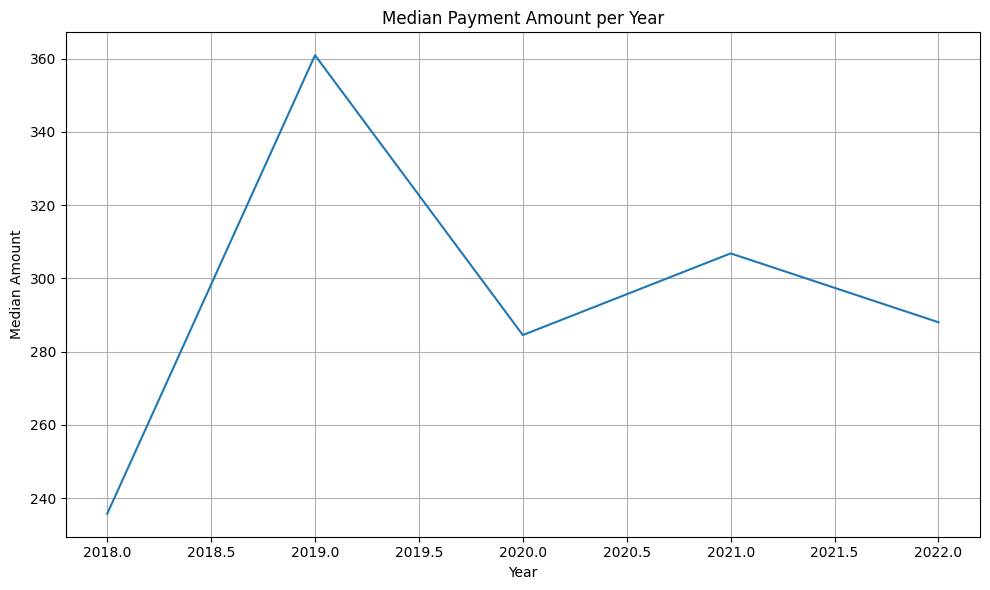

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(data=median_by_year)
plt.title('Median Payment Amount per Year')
plt.xlabel('Year')
plt.ylabel('Median Amount')
plt.grid(True)
plt.tight_layout()
plt.savefig("median_payment_trend.png")  # Save the plot
plt.show()

### Results Inferred from above analysis

- **Finance Lending** has more clients than **Block Chain**, indicating a stronger presence in traditional financial sectors.
- Clients from the **Gaming industry** are the most loyal, with a **72% renewal rate**.
- Subscriptions were typically renewed during periods of **moderate inflation**, averaging around **4.31%**.
- The **median payment amount** varied each year, **peaking in 2019**, possibly due to changes in subscription pricing or user behavior.

### Repository Link:
- [Skygeni Project](https://github.com/ayushpratapsingh1/Skygeni-Project)

### 📍 Connect with Me:
- [GitHub](https://github.com/ayushpratapsingh1)
- [LinkedIn](https://www.linkedin.com/in/ayushpratapsingh1)
